<a href="https://colab.research.google.com/github/SungyeonJang/mining2022/blob/main/datavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigMining/health_data.csv")

display(health.head(10)) 
print(health.info())     

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,1.1,25.0,32.0,26.0,Yes,Yes,0,NaN,NaN,12/29/2021
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,1.2,18.0,17.0,19.0,Yes,No,1,0.0,2.0,12/29/2021
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,0.7,42.0,48.0,39.0,No,No,0,NaN,NaN,12/29/2021
9,2020,10,48,F,14,150,45,71.2,0.8,0.7,...,0.6,22.0,11.0,10.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [ ]:
# order_id 는 숫자로 계산할 필요가 없는 값이므로 문자로 변환
health['가입자일련번호'] = health['가입자일련번호'].astype(str)  

# 모든 수치 데이터의 기초 통계량 보여주기
print(health.describe())   # 평균적으로 1.07개 주문

print('총콜레스테롤:', len(health['가입자일련번호'].unique()))    # unique: 고유값
print('허리둘레: ', len(health['허리둘레'].unique()))

          기준년도          시도코드   연령대코드(5세단위)     신장(5Cm단위)    체중(5Kg 단위)  \
count  10000.0  10000.000000  10000.000000  10000.000000  10000.000000   
mean    2020.0     34.100100     11.931400    160.983500     63.034500   
std        0.0     12.394581      2.166048      9.211608     12.205294   
min     2020.0     11.000000      9.000000    130.000000     30.000000   
25%     2020.0     27.000000     10.000000    155.000000     55.000000   
50%     2020.0     41.000000     12.000000    160.000000     60.000000   
75%     2020.0     44.000000     13.000000    170.000000     70.000000   
max     2020.0     49.000000     18.000000    195.000000    130.000000   

               허리둘레         시력(좌)         시력(우)         청력(좌)         청력(우)  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      82.366100      0.933750      0.936750      1.050500      1.045200   
std        9.561973      0.662057      0.641378      0.227936      0.218545   
min       53.0000

In [ ]:
허리둘레 = health['허리둘레'].value_counts()
print(허리둘레)

콜레스테롤 = health['총콜레스테롤'].value_counts()
print(콜레스테롤)

80.0     411
84.0     364
82.0     345
86.0     339
81.0     333
        ... 
66.9       1
68.7       1
58.3       1
62.4       1
107.4      1
Name: 허리둘레, Length: 423, dtype: int64
202.0    46
193.0    45
176.0    45
167.0    45
208.0    44
         ..
387.0     1
103.0     1
358.0     1
328.0     1
306.0     1
Name: 총콜레스테롤, Length: 238, dtype: int64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54728 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_te

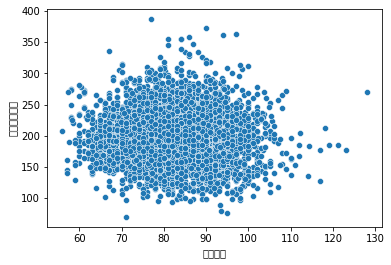

In [ ]:
sns.scatterplot(data = health, x = '허리둘레', y = '총콜레스테롤')
#대부분의 사람들이 허리둘레는 60~100, 총콜레스테롤수치는 100~300사이에 모여있다

In [ ]:
df_health = health.groupby('성별코드' , as_index = False).agg( 혈색소 = ('혈색소', 'mean'))
df_health

,성별코드,혈색소
0,F,13.230865
1,M,15.140615


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_te

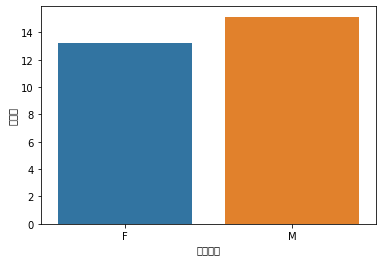

In [ ]:
sns.barplot(data = df_health, x = '성별코드', y = '혈색소')
#여성보다 남성이 평균적으로 혈색소 수가 많다

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_

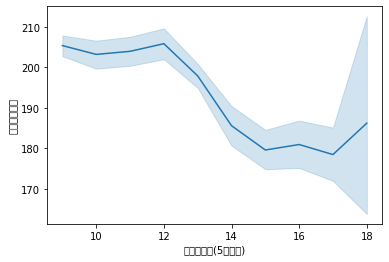

In [ ]:
sns.lineplot(data = health, x = '연령대코드(5세단위)', y = '총콜레스테롤')

#나이가 많을 수록 총콜레스테롤 수치가 줄어든다